<a href="https://colab.research.google.com/github/khanabdulmajid/Genrative-Adversarial-Networks-101/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,UpSampling2D,Conv2D,Reshape,Conv2DTranspose,Flatten,LeakyReLU ,Dropout
from numpy.random import rand, randn
from numpy import vstack

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


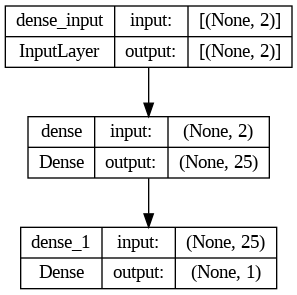

In [ ]:

def define_descriminator(n_inputs=2):
  model= Sequential()
  model.add(Dense(25,input_dim=n_inputs,activation='relu',
                  kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

model = define_descriminator()
model.summary()
plot_model(model,
           to_file ='discriminator_plot.png',
           show_shapes=True,show_layer_names=True)

In [49]:
def generate_real_samples(n):
  X1 = rand(n)-0.5
  X2 = X1*X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  y = np.ones((n,1))
  return X,y

# def generate_fake_samples(n):
#   X1 = -1 + rand(n)*2
#   X2 = -1 + rand(n)*2
#   X1 = X1.reshape(n,1)
#   X2 = X2.reshape(n,1)
#   X = np.hstack((X1,X2))
#   y = np.zeros((n,1))
#   return X,y,

def generate_fake_samples(genrator,latent_dim,n):
  x_input = generate_latent_points(latent_dim,n)
  X = generator.predict(x_input)
  y =np.zeros((n,1))
  return X,y

def generate_latent_points(latent_dim,n):
  x_input= randn(latent_dim*n)
  x_input= x_input.reshape(n,latent_dim)
  return x_input

# 15 dense layers 2 output layers
def define_generator(latent_dim,n_outputs=2):
  model= Sequential()
  model.add(Dense(15,activation="relu", kernel_initializer="he_uniform",
                  input_dim=latent_dim))
  model.add(Dense(n_outputs))
  return model

def define_gan(generator,dicriminator):
  model=Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss='binary_crossentropy',optimizer='adam')
  return model

def summarize_performance(epoch, generator,discriminator, latent_dim, n_samples=100):
  x_real, y_real = generate_real_samples(n_samples)
  _,acc_real = discriminator.evaluate(x_real,y_real)
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n_samples)
  _,acc_fake = discriminator.evaluate(x_fake,y_fake)
  print(epoch,acc_real,acc_fake)
  plt.scatter(x_real[:,0],x_real[:,1],color='red')
  plt.scatter(x_fake[:,0],x_fake[:,1],color='blue')
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

def train(g_model,d_model, gan_model, latent_dim,n_epochs=10000, n_batch=128, n_eval =2000):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = np.ones((n_batch, 1))
    gan_model.train_on_batch(x_gan, y_gan)
    if (i+1) % n_eval == 0:
      summarize_performance(i, g_model, d_model, latent_dim)

In [50]:
def train_discriminator(model,n_epochs=1000,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    # train discriminator on real samples
    X_real,y_real = generate_real_samples(half_batch)
    model.train_on_batch(X_real,y_real)

    # train discriminator on fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    model.train_on_batch(X_fake, y_fake)

    #evaluate the model
    _,acc_real = model.evaluate(X_real,y_real,verbose=0)
    _,acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i,acc_real, acc_fake)

#Now we define the `Generator`

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                75        
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


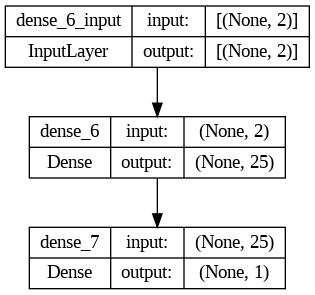

In [ ]:
gen_model = define_generator(5)
model.summary()
plot_model(model, to_file="genrator_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
latent_dim=5
discriminator = define_descriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator,discriminator)
train(generator, discriminator,gan_model,latent_dim)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 5ms/step - loss: 1.5438 - accuracy: 0.0000e+00
5999 1.0 0.0
4/4 [==============================] - 0s 6ms/step - loss: 1.5546 - accuracy: 0.0000e+00
7999 1.0 0.0
4/4 [==============================] - 0s 5ms/step - loss: 1.5626 - accuracy: 0.0000e+00
9999 1.0 0.0


#Working with MNIST Hand Written Digits data

In [3]:
from  tensorflow.keras.datasets.mnist import load_data
(trainX,trainY), (testX,testY) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


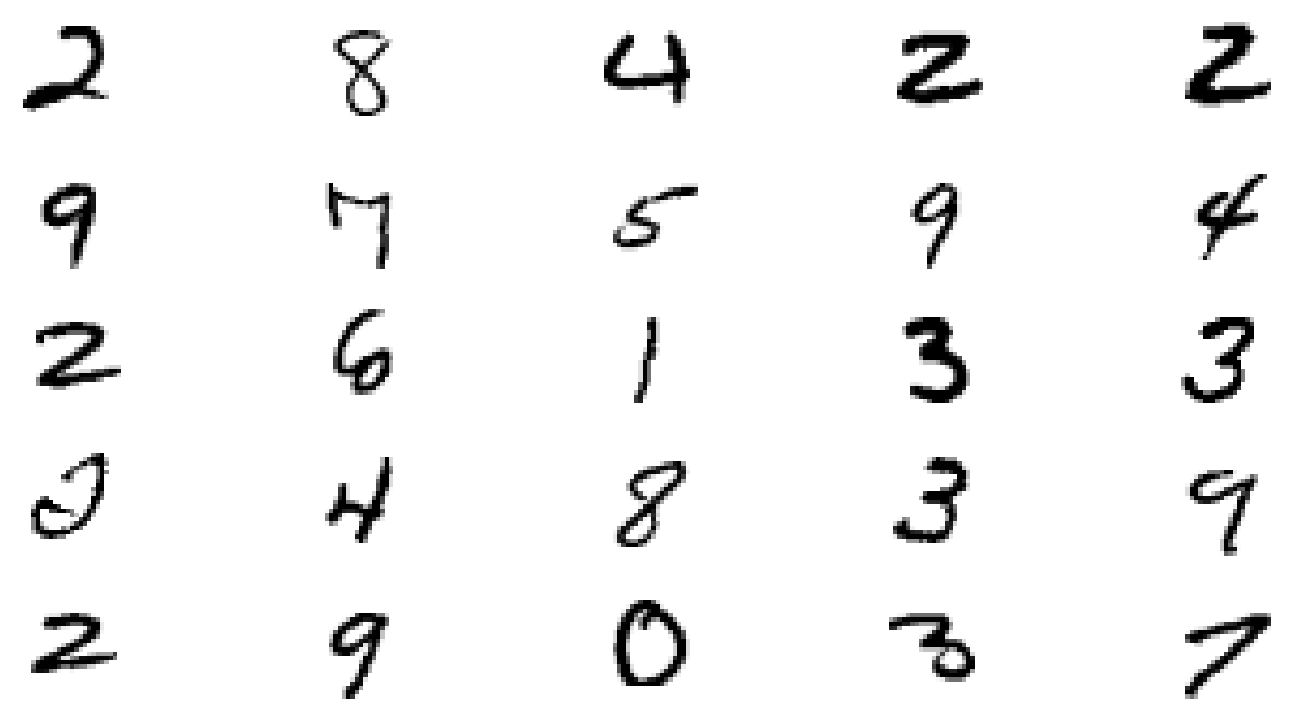

In [62]:
plt.figure(figsize= (18,9))
for i in range(25):
    plt.subplot(5, 5, i+1)
    rndm = 100 + 100*np.random.randn(1)
    rndm = np.array(rndm, dtype= int)
    plt.axis('off')
    plt.imshow(trainX[rndm[0]], cmap= 'gray_r')
plt.show()

In [22]:
trainX.shape

(60000, 28, 28)

In [4]:
def load_real_samples():
  (trainX,_), (_,_) = load_data()
  X = tf.expand_dims(trainX, axis=-1)
  X = trainX.astype('float32')
  X = trainX / 255.0
  print(f"shape of data is {X.shape}")
  return X

def generate_real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X, y

def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape((n_samples, latent_dim))
  return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
  X_input = generate_latent_points(latent_dim= latent_dim, n_samples= n_samples)
  X = g_model.predict(X_input)
  y = np.zeros((n_samples, 1))
  return np.squeeze(X), y

def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64,(3,3),strides=2, padding='same', input_shape =in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,(3,3),strides=2,padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(1,'sigmoid'))
  opt = tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

def define_generator(latent_dim):
  n_nodes = 128*7*7
  model = Sequential()
  model.add(Dense(n_nodes,input_dim=latent_dim))# why latent dim
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7,7,128)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
  return model

def save_plot(examples,epoch, n=10):
  for i in range(n*n):
    plt.subplot(n,n,1+i)
    plt.axis('off')
    plt.imshow(examples[i, :,:,0],cmap='gray_r')
  filename= 'generated_plot_%3d.png'  %(epoch+1)
  plt.savefig(filename)
  plt.close()

def summarize_performance(epoch, g_model, d_model, dataset,latent_dim,
                          n_samples=100):

  X_real,y_real =generate_real_samples(dataset, n_samples)
  _,acc_real = d_model.evaluate(X_real,y_real, verbose=1)
  X_fake,y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
  _,acc_fake = d_model.evaluate(X_fake, y_fake, verbose=1)
  print(f"Accuracy real = {acc_real*100}, fake = {acc_fake*100}")
  save_plot(X_fake,epoch)
  filename = 'generator_model%03d.h5' % (epoch+1)
  g_model.save(filename)


def define_gan(g_model,d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

#

def train(g_model,d_model,gan_model,dataset, latent_dim, n_epochs=100,
          n_batch=256):

  print("starting training")
  bat_per_epo =int(dataset.shape[0]/n_batch)
  half_batch=int(n_batch/2)
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real,y_real= generate_real_samples(dataset,half_batch)
      X_fake,y_fake = generate_fake_samples(g_model,latent_dim, half_batch)
      X,y = vstack((X_real,X_fake)), vstack((y_real,y_fake))
      d_loss,_ = d_model.train_on_batch(X,y)
      X_gan = generate_latent_points(latent_dim,n_batch)
      y_gan = np.ones((n_batch,1))
      g_loss = gan_model.train_on_batch(X_gan,y_gan)
      print(f'n_epoch= {i+1},bat_per_epo = {bat_per_epo}, d_loss= {d_loss}, g_loss = {g_loss}')
    if (i+1) % 10 == 0:
      summarize_performance(i,g_model,d_model,dataset,latent_dim)


In [7]:
dataset = load_real_samples()

shape of data is (60000, 28, 28)


#trying generator model

In [8]:
X_real,y_real= generate_real_samples(dataset,128)
X_fake,y_fake = generate_fake_samples(g_model,latent_dim, 128)
X= vstack((X_real,X_fake))
y=vstack((y_real,y_fake))

NameError: name 'g_model' is not defined

In [6]:
print(y_real.shape,y_fake.shape,X_real.shape,X_fake.shape)

NameError: name 'y_real' is not defined

In [120]:
# #Trying the model

# latent_dim = 100
# samples = 25
# g_model = define_generator(latent_dim= latent_dim)
# X, _ = generate_fake_samples(g_model= g_model, latent_dim= latent_dim, n_samples= samples)



# # Visualizing the model

# plt.figure(figsize= (18,9))
# for i in range(samples):
#     plt.subplot(5, 5, i+1)
#     plt.imshow(X[i,:,:,0], cmap= 'gray_r')
# plt.show()



In [ ]:
latent_dim=100

d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model,d_model)
gan_model.summary()
plot_model(gan_model,show_layer_names=True,show_shapes=True,to_file='gan_model.png')
train(g_model,d_model,gan_model,dataset,latent_dim)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential (Sequential)     (None, 1)                 40705     
                                                                 
Total params: 1204994 (4.60 MB)
Trainable params: 1164289 (4.44 MB)
Non-trainable params: 40705 (159.00 KB)
_________________________________________________________________
starting training
4/4 [==============================] - 2s 5ms/step
n_epoch= 1,bat_per_epo = 234, d_loss= 0.7051371335983276, g_loss = [0.6696070432662964, 0.72265625]
4/4 [==============================] - 0s 4ms/step
n_epoch= 1,bat_per_epo = 234, d_loss= 0.6988786458969116, g_loss = [0.6855778694152832, 0.59375]
4/4 [==============================] - 0s 3ms/step
n_epoch= 1,bat_per_epo = 234, d_loss= 0.

In [56]:
dataset[0].shape, dataset[1].shape

((28, 28), (28, 28))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

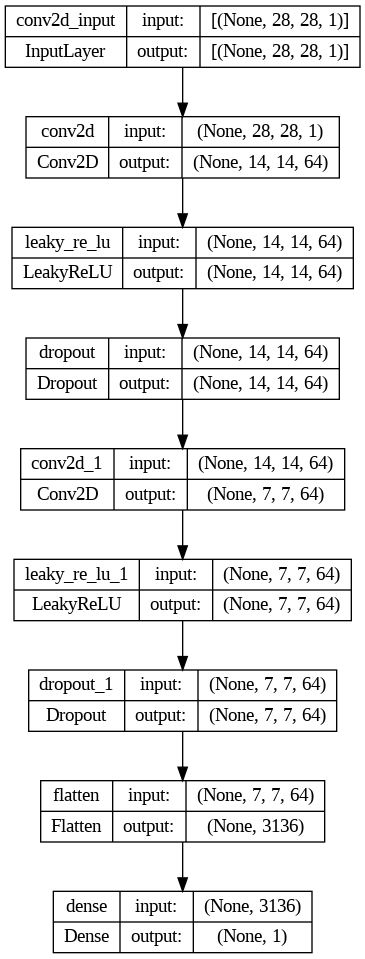

In [5]:
print(d_model.summary())
plot_model(d_model,show_layer_names=True,show_shapes=True,to_file='d_model.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

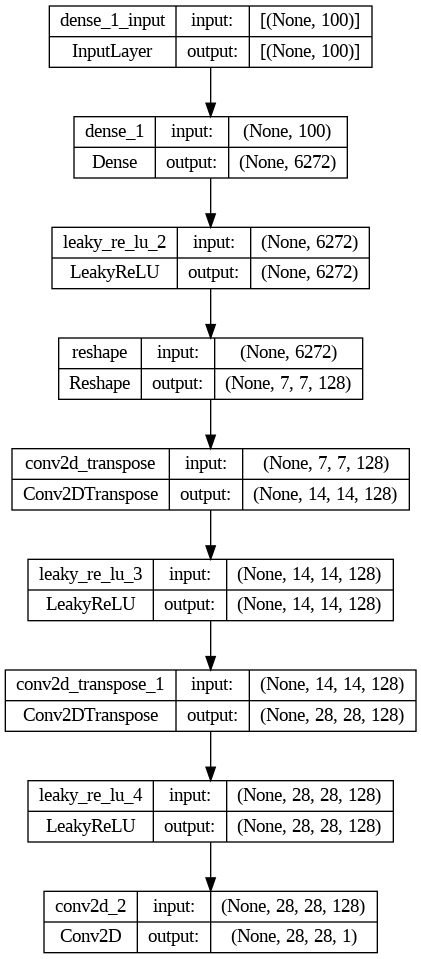

In [6]:
latent_dim=100
g_model = define_generator(latent_dim)
print(g_model.summary())
plot_model(g_model,show_layer_names=True,show_shapes=True, to_file='g_model.png')